# Homework 1 from Martin Gräf, Richard Baumann and Thomas Block

The main focus in this homework will be the ising model. In this particular example we look at a one-dimensional version of the modell, which describes a chain of spins. Due to this one-dimensionallity, if we observe one particle in the chain, it has only two neighbours. 

The Hamiltionian of the system can be written as: 

\begin{equation}
    H(\sigma) = - J \sum_{\langle x~y\rangle} \sigma_x \sigma_y - h \sum_x \sigma_x
\end{equation}





## Exercise 1: Discuss the physical meaning of J, in particular the sign of J, and the role it plays in magnets, for example.
In the equation above, J is a coupling constant, which decribes the interaction between the magnetic moments:

*  J<0: spins are aligned mostly antiparallel. The interaction is called antiferromagenitc.
*  J=0: spins are non-interacting.
*  J>0: spins are aligned mostly parallel. The interaction called ferromagenitc.

## Exercise 2: Clarify what it means to have periodic boundary conditions (nearest neighbors)



## Exercise 3: Implement the Ising 1d simulation: 

In [58]:
#just importing stuff, nothing to see here yet :)

import numpy as np 
import random as rd
import matplotlib.pyplot as plt
import math
import itertools 

As previously mentioned, the hamiltionian is calculated by:

\begin{equation}
    H(\sigma) = - J \sum_{\langle x~y\rangle} \sigma_x \sigma_y - h \sum_x \sigma_x.
\end{equation}

That can be implemented as a function.

In [59]:
#Calculate Hamiltonian. J and h are floats, the spin is supposed to be an array.
def hamiltionian(spin, j, h):
    minuend = 0
    subtrahend = 0
    for i in range(len(spin)-1):
        minuend = minuend + spin[i]*spin[i+1]
        subtrahend = subtrahend + spin[i] 
    return (-j*minuend-h*subtrahend)

We assume, that the spins are distributed following a Bolzmann distribution (a fact, that is given by the exercise sheet):

\begin{equation}
    P(s)=\frac{ exp \big[-\frac{H(s)}{k_{b}T} \big]}{\sum_{s`} exp \big[-\frac{H(s`)}{k_{b}T}\big]}  = \frac{1}{Z} exp \big[-\frac{H(s)}{k_{b}T} \big].
\end{equation}

Therefore Z can be determined via:

\begin{equation}
    Z={\sum_{s`} exp \big[-\frac{H(s`)}{k_{b}T}\big]} 
\end{equation}

In [60]:
def z_simulated(spin_configurations, j, h, t):
    sum=0
    for i in range(len(spin_configurations)):
        sum=sum+np.exp(-hamiltionian(spin_configurations[i], j, h)/t)
    return (sum)

Now an array has to be generated, that contains all possible spin configurations:

In [61]:
def gen_spinarrays(length):
    return(list(itertools.product([-1, 1], repeat=(length+1))))


Now we can also implement the numerical solution that is given on the exercise sheet:

\begin{equation}
    Z=\lambda_{+}^{N}+\lambda_{-}^{N}, 
\end{equation}

with:

\begin{equation}
    \lambda_{\pm}=e^{\frac{J}{T}} \big( \cosh(\frac{h}{T}) \pm \sqrt{\sinh(\frac{h}{T})^{2}+ e^{-4\frac{J}{T}}} \big).
\end{equation}


In [62]:
def lambda_pm(j, h, t, plus_minus):
    plus_minus_part=plus_minus*(np.sinh(h/t)**2+np.exp(-4*j/t))**(1/2)
    return(np.exp(j/t)*(np.cosh(h/t)+plus_minus_part))

def z_analytical(lenght, j, h, t):
    return(lambda_pm(j, h, t, 1)**lenght+lambda_pm(j, h, t, -1)**lenght)

Finally, the magnetization per spin is defined as:

\begin{equation}
    <m>=-\frac{T}{N}\frac{\partial log(Z)}{\partial h} 
\end{equation}

In [63]:
def magnetization_simulation(lenght, j, h, t, intervall):
    z_1=z_simulated(gen_spinarrays(lenght), j, h+(intervall/2), t)
    z_2=z_simulated(gen_spinarrays(lenght), j, h-(intervall/2), t)
    return (-1/lenght*((np.log(z_1)-np.log(z_2))/intervall))

def magnetization_analytical(lenght, j, h, t, intervall):
    z_1=z_analytical(lenght, j, h+(intervall/2), t)
    z_2=z_analytical(lenght, j, h-(intervall/2), t)
    return (-1/lenght*((np.log(z_1)-np.log(z_2))/intervall))


Now we can put some numbers into our calculations:
*  J=1 (given on the exercise sheet)
*  J=0: spins are non-interacting.
*  J>0: spins are aligned mostly parallel. The interaction called ferromagenitc.


In [64]:
N=10
J=1
h=0.5
t=1

print(z_simulated(gen_spinarrays(N), J, h, t))
print(z_analytical(N, J, h, t))

26287.962334655665
22343.846756493887


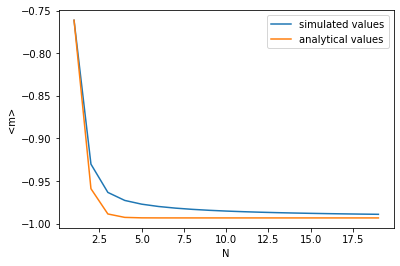

In [80]:
N_array=np.arange(1, 20, 1)
magnetization_N_dependance_simulation=np.zeros(len(N_array))
magnetization_N_dependance_analytical=np.zeros(len(N_array))
for i in range(len(N_array)):
    magnetization_N_dependance_simulation[i]=magnetization_simulation(N_array[i], J, h, t, 0.1)
    magnetization_N_dependance_analytical[i]=magnetization_analytical(N_array[i], J, h, t, 0.1)
plt.plot(N_array, magnetization_N_dependance_simulation, label="simulated values")
plt.plot(N_array, magnetization_N_dependance_analytical, label="analytical values")
plt.legend(loc="best")
plt.xlabel("N")
plt.ylabel("<m>")

plt.savefig("Diagramm_N_m.png", dpi=300)

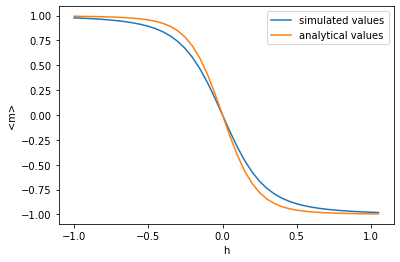

In [81]:
h_array=np.arange(-1, 1.1, 0.05)
magnetization_h_dependance_simulation=np.zeros(len(h_array))
magnetization_h_dependance_analytical=np.zeros(len(h_array))
for i in range(len(h_array)):
    magnetization_h_dependance_simulation[i]=magnetization_simulation(N, J, h_array[i], t, 0.1)
    magnetization_h_dependance_analytical[i]=magnetization_analytical(N, J, h_array[i], t, 0.1)
plt.plot(h_array, magnetization_h_dependance_simulation, label="simulated values")
plt.plot(h_array, magnetization_h_dependance_analytical, label="analytical values")
plt.legend(loc="best")
plt.xlabel("h")
plt.ylabel("<m>")
plt.savefig("Diagramm_h_m.png", dpi=300)